In [256]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lin_m

In [257]:
data=pd.read_excel("../AirQualityUCI.xlsx")
print(data[:1])


        Date      Time   CO  PT08_S1  NMHC       C6H6  PT08_S2    Nox  \
0 2004-03-10  18:00:00  2.6   1360.0   150  11.881723   1045.5  166.0   

   PT08_S3    NO2  PT08_S4  PT08_S5     T         RH        AH  
0  1056.25  113.0   1692.0   1267.5  13.6  48.875001  0.757754  


In [258]:
print(len(data))
data=data[data['CO']!=-200]
data=data[data['T']!=-200]
print(len(data))


9357
7344


In [259]:
t1 = []
for line in data["Date"]:
    t1.append(line.timetuple().tm_yday)
print (t1[:10])

[70, 70, 70, 70, 70, 70, 71, 71, 71, 71]


In [260]:
t2 = []
for line in data["Time"]:
    t2.append(line.hour)
print (t2[:10])

[18, 19, 20, 21, 22, 23, 0, 1, 2, 3]


In [269]:
T = []
T=list(T)
for i, line in enumerate(t1):
    row=t1[i]*24+t2[i]
    row=float(row)
    T.append(t1[i]*24+t2[i])
print (T[:2])
T=np.array(T)
print (T[:2])

[1698, 1699]
[1698 1699]


In [270]:
temp = []
for line in data["T"]:
    temp.append(line)
print(temp[:10])

[13.599999904633, 13.299999952316, 11.900000095367, 11.0, 11.150000095367, 11.175000190735, 11.324999809265, 10.674999952316, 10.650000095367, 10.250000238419]


In [271]:
Y = []
Y=list(Y)
for line in data["CO"]:
    Y.append(line)
print (Y[:10])

[2.6000000000000001, 2.0, 2.2000000000000002, 2.2000000000000002, 1.6000000000000001, 1.2, 1.2, 1.0, 0.90000000000000002, 0.59999999999999998]


In [272]:
regres=lin_m.LinearRegression()
regres.fit(T[:100],Y)
y_reg = reg.predict(x)

ValueError: Expected 2D array, got 1D array instead:
array=[1698 1699 1700 1701 1702 1703 1704 1705 1706 1707 1709 1710 1711 1712 1713
 1714 1715 1716 1717 1718 1719 1720 1721 1722 1723 1724 1725 1726 1727 1728
 1729 1730 1731 1733 1734 1735 1736 1738 1739 1740 1741 1742 1743 1744 1745
 1746 1747 1748 1749 1750 1751 1752 1753 1754 1755 1757 1758 1759 1760 1761
 1762 1763 1764 1765 1766 1767 1768 1769 1770 1771 1772 1773 1774 1775 1776
 1777 1778 1779 1781 1782 1783 1784 1785 1786 1787 1788 1789 1790 1791 1792
 1793 1794 1795 1796 1797 1798 1799 1800 1801 1802].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

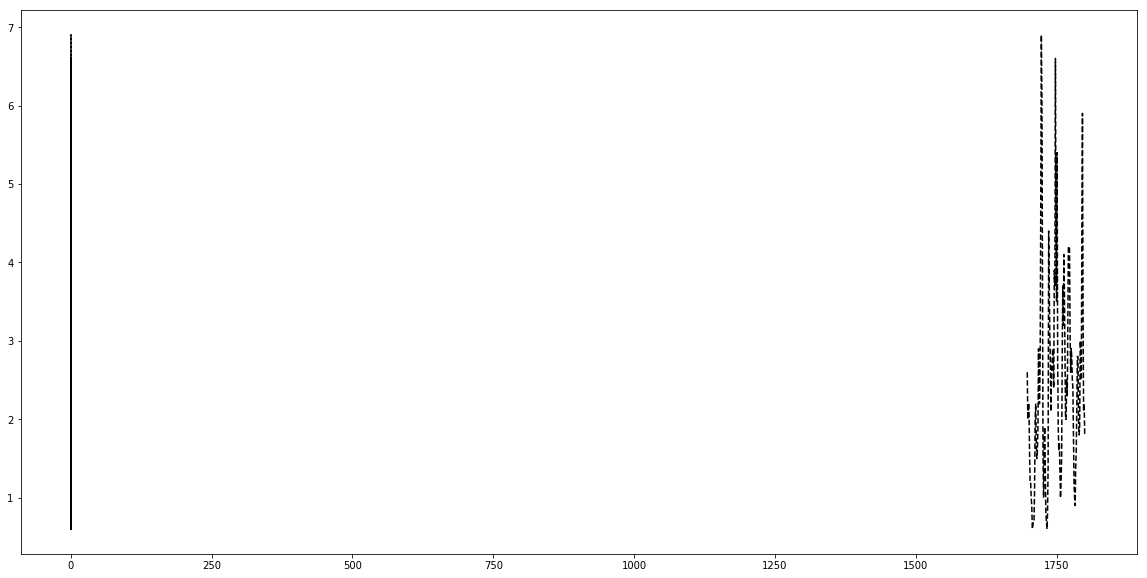

In [255]:
plt.figure(figsize=(20,10))
plt.plot(T[:100],Y[:100], '--k', ms=5)
plt.show()
# plt.plot(T,temp, 'ok', ms=5)
# plt.show()

In [246]:
def normalize(X):
    # count max
    multiplier = [max(factor) for factor in X]
    new_X = []
    for i, factor in enumerate(X):
        # divide every entry by it
        new_X.append([x_i/multiplier[i] for x_i in factor])
    new_X = np.transpose(new_X)
    return new_X, multiplier

In [250]:
mlpr=[max(factor) for factor in T]
print(mlpr)
new_T=[]

[1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1733, 1734, 1735, 1736, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 187

In [247]:
C = np.dot(np.transpose(T),T)
G = np.linalg.inv(C)
B = np.dot(np.dot(G,np.transpose(T)),Y)
print(B)


[  1.88144378e+00   6.05413298e-05]


In [248]:
new_X,ml=normalize(T)
print(new_X)
# new_C = np.dot(np.transpose(new_X),new_X)
# new_G = np.linalg.inv(new_C)
# new_B = np.dot(np.dot(new_G,np.transpose(new_X)),Y)
# print(new_B)


[[  5.88928151e-04   5.88581519e-04   5.88235294e-04 ...,   4.40917108e-04
    4.40722785e-04   4.40528634e-04]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]]


In [186]:
def show(X, Y, B, dims=[1]):
    for dim in dims:
        # Warning! It works only for 1D of x
        plt.figure()
        # show train data first 
        plt.scatter(X[:,dim], y=Y)
        # then plot prediction line
        X_line, Y_line = X[:, 1], np.dot(X,B)
        xs = [X_line[0], X_line[-1]]
        ys = [Y_line[0], Y_line[-1]]
        plt.plot(xs, ys)
        plt.show()

SyntaxError: invalid syntax (<ipython-input-188-c8b4ea1c2990>, line 1)